# Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

- In machine learning, especially in the context of Support Vector Machines (SVMs) and kernelized methods, there is a close relationship between polynomial functions and kernel functions.

A kernel function in machine learning is a way of implicitly mapping input data into a higher-dimensional space without explicitly calculating the coordinates of the data points in that space. This is known as the "kernel trick." The kernel function defines the similarity between two points in the higher-dimensional space, and it is often used to capture complex relationships and non-linear decision boundaries.

Polynomial kernel functions are a specific type of kernel function. They are used to introduce non-linearity in the decision boundary by computing the dot product raised to a power. The polynomial kernel function is defined as:

\[ K(x, y) = (x \cdot y + c)^d \]

Here:
- \( x \) and \( y \) are input data points.
- \( c \) is a constant term.
- \( d \) is the degree of the polynomial.

The polynomial kernel function is equivalent to performing a polynomial transformation of the input features and then computing the dot product in the higher-dimensional space.

The relationship between polynomial functions and kernel functions can be understood as follows:

1. **Polynomial Functions:**
   - In a traditional polynomial regression or classification setting, you explicitly transform the input features using polynomial functions. For example, for a 2D feature space \((x_1, x_2)\), you might transform it to \((1, x_1, x_2, x_1^2, x_1x_2, x_2^2, \ldots)\) for a polynomial of degree 2.
   - The explicit computation of polynomial features can lead to a higher-dimensional space, but it can be computationally expensive, especially as the degree of the polynomial increases.

2. **Polynomial Kernel Functions:**
   - In kernelized methods like SVM, the polynomial kernel function allows you to achieve the same effect without explicitly calculating the transformed features.
   - The kernel trick enables SVM to operate in the higher-dimensional space without the need to compute the coordinates explicitly. The dot product in the higher-dimensional space is effectively computed using the kernel function.

# Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Select only two features for illustration purposes
X = X[:, :2]

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [6]:
# Create SVM classifier with a polynomial kernel
# Here, 'degree' is the degree of the polynomial, and 'C' is the regularization parameter
svm_classifier = SVC(kernel='poly', degree=3, C=1, random_state=42)

In [7]:
# Train the SVM classifier
svm_classifier.fit(X_train_std, y_train)

SVC(C=1, kernel='poly', random_state=42)

In [8]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_std)

In [9]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [10]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.76

Confusion Matrix:
[[19  0  0]
 [ 0 11  2]
 [ 0  9  4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.55      0.85      0.67        13
           2       0.67      0.31      0.42        13

    accuracy                           0.76        45
   macro avg       0.74      0.72      0.70        45
weighted avg       0.77      0.76      0.74        45



In [11]:
# Plot decision boundary for two features
h = 0.02  # Step size in the mesh
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

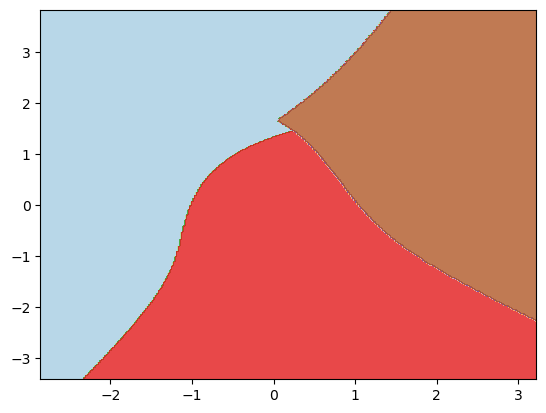

In [12]:
# Plot decision boundary
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

C:\Users\SMITA\AppData\Local\Temp\ipykernel_23916\2191316771.py:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='x')


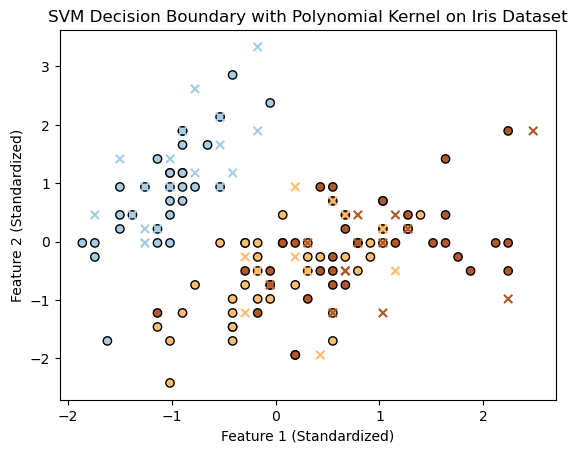

In [13]:
# Plot the data points
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='x')

plt.title('SVM Decision Boundary with Polynomial Kernel on Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

# Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

- In Support Vector Regression (SVR), epsilon (denoted as \(\varepsilon\)) is a parameter that defines the width of the margin or the tube around the regression line within which no penalty is incurred. It is often associated with the "epsilon-insensitive loss function," which allows errors within a certain range (\(\varepsilon\)) to be ignored.

The impact of increasing the value of epsilon on the number of support vectors in SVR can be understood by considering the nature of the SVR problem:

1. **Smaller Epsilon (\(\varepsilon\)):**
   - A smaller value of epsilon tightens the tolerance for errors. It means that points within a smaller range around the predicted value are considered as support vectors.
   - As a result, the SVR model becomes more sensitive to individual data points, and more data points may become support vectors.

2. **Larger Epsilon (\(\varepsilon\)):**
   - A larger value of epsilon increases the tolerance for errors. It allows a wider range around the predicted value within which no penalty is incurred.
   - With a larger epsilon, the SVR model becomes less sensitive to individual data points, and fewer data points may become support vectors.

- It's essential to strike a balance when choosing the value of epsilon. Too small a value may result in overfitting, where the model becomes overly sensitive to noise in the training data, leading to a high number of support vectors. On the other hand, too large a value may lead to underfitting, where the model is too lenient, resulting in a smaller number of support vectors but potentially sacrificing predictive accuracy.

- The optimal choice of epsilon depends on the characteristics of the data and the specific requirements of the regression task. It is often determined through cross-validation or other model evaluation techniques.

# Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value

- Support Vector Regression (SVR) involves several parameters that significantly influence its performance. Here's an explanation of key SVR parameters and how they can affect the model:

1. **Kernel Function:**
   - **Explanation:** The choice of the kernel function determines the type of transformation applied to the input data. Common kernel functions include linear, polynomial, radial basis function (RBF or Gaussian), and sigmoid.
   - **Effect on Performance:**
     - **Linear Kernel (\(K(x, y) = x \cdot y\)):** Suitable for linear relationships.
     - **Polynomial Kernel (\(K(x, y) = (x \cdot y + c)^d\)):** Introduces non-linearity. Increase degree (\(d\)) for more complex relationships.
     - **RBF Kernel (\(K(x, y) = \exp(-\gamma \|x - y\|^2)\)):** Suitable for non-linear relationships. Adjust \(\gamma\) for smoothness (lower \(\gamma\)) or complexity (higher \(\gamma\)).
     - **Sigmoid Kernel (\(K(x, y) = \tanh(\alpha x \cdot y + c)\)):** Suitable for neural network-like relationships.

2. **C Parameter:**
   - **Explanation:** The regularization parameter \(C\) controls the trade-off between fitting the training data and having a smooth decision surface. A smaller \(C\) allows for a larger margin but more violations (errors), while a larger \(C\) penalizes errors more heavily.
   - **Effect on Performance:**
     - **Small C:** Emphasizes a larger margin, potentially leading to underfitting.
     - **Large C:** Emphasizes fitting the data points more closely, potentially leading to overfitting.

3. **Epsilon Parameter (\(\varepsilon\)):**
   - **Explanation:** Epsilon defines the margin of tolerance around the predicted value within which no penalty is associated with errors.
   - **Effect on Performance:**
     - **Small \(\varepsilon\):** A smaller margin, making the model more sensitive to individual data points.
     - **Large \(\varepsilon\):** A larger margin, making the model less sensitive to individual data points.

4. **Gamma Parameter (\(\gamma\)):**
   - **Explanation:** For RBF kernel, \(\gamma\) defines the influence of a single training example. High values result in a more complex decision boundary.
   - **Effect on Performance:**
     - **Small \(\gamma\):** A larger similarity radius, resulting in a smoother decision boundary.
     - **Large \(\gamma\):** A smaller similarity radius, making the decision boundary more influenced by individual data points.

**Example Scenarios:**
- **Choosing Kernel Function:**
  - Use a linear kernel for linear relationships.
  - Use an RBF kernel for non-linear and complex relationships.
  - Experiment with polynomial kernels for various degrees to balance complexity.

- **Setting C Parameter:**
  - Use a small \(C\) to emphasize a larger margin when the dataset has noise or outliers.
  - Use a large \(C\) when a precise fit to the data is required, and there's confidence in the data's accuracy.

- **Setting Epsilon Parameter:**
  - Use a smaller \(\varepsilon\) if you want the model to closely follow individual data points.
  - Use a larger \(\varepsilon\) for a more robust model that is less influenced by individual data points.

- **Setting Gamma Parameter:**
  - Use a small \(\gamma\) for a smoother decision boundary when dealing with a large number of data points.
  - Use a large \(\gamma\) for a more complex decision boundary when the dataset is small or has distinct patterns.

# Q5. Assignment:
- Import the necessary libraries and load the dataseg
- Split the dataset into training and testing setZ
- Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
- Create an instance of the SVC classifier and train it on the training datW
- hse the trained classifier to predict the labels of the testing datW
- Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-scoreK
- Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to improve its performanc_
- Train the tuned classifier on the entire dataseg
- Save the trained classifier to a file for future use.

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import joblib

In [15]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Preprocess the data (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Create an instance of the SVC classifier
svc_classifier = SVC()

In [19]:
# Train the classifier on the training data
svc_classifier.fit(X_train_scaled, y_train)

SVC()

In [20]:
# Use the trained classifier to predict labels of the testing data
y_pred = svc_classifier.predict(X_test_scaled)

In [21]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Initial Classifier Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Initial Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [23]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

print("\nBest Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [26]:
# Train the tuned classifier on the entire dataset
tuned_classifier = SVC(**best_params)
tuned_classifier.fit(X_train_scaled, y_train)  # Use X_train_scaled, not X_scaled

SVC(C=100, gamma=0.01)

In [29]:
# Save the trained classifier to a file (replace 'tuned_classifier_model.pkl' with your desired file name)
joblib.dump(tuned_classifier, 'tuned_classifier_model.pkl')


['tuned_classifier_model.pkl']